In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.impute import SimpleImputer as si

trains = pd.read_csv('train.csv', header=None)
# trian = np.loadtxt('train.csv', dtype='str', delimiter=',')

In [2]:
x = pd.DataFrame(trains)
x = x.replace('?',np.nan)

imp = si(missing_values=np.nan ,strategy='most_frequent')
imp.fit(x)
x = imp.transform(x)

train = np.array(x, dtype=np.int)
train = train.astype(np.int)
# train_test = train[-1000:]
# train_train = train[:-1000]

# train_x = torch.from_numpy(train_train[:,:-1]).float()
# train_y = torch.from_numpy(train_train[:,-1])-1

In [3]:
# 性别、婚姻状况、年龄、教育程度、职业、工作年限、双收入、家庭成员、18岁以下、户主状况、家庭类型、民族类别、语言。

train_ce = train.copy()

# index = np.where(train_ce[:,-1]==1)
# train_train = train_ce[index]
a = train_ce[:,0] + train_ce[:,3]
b = train_ce[:,0] + train_ce[:,4]
c = train_ce[:,3] + train_ce[:,4]
d = train_ce[:,3] + train_ce[:,5]
e = train_ce[:,5]
f = train_ce[:,3]
j = train_ce[:,4]
q = np.array([a,b,c,d,e,f,j,train_ce[:,-1]])
train_ce = (q.T)
train_ce = train_ce[:,[2,3,4,5,6,7]]
train_test = train_ce[-1000:]
train_train = train_ce[:-1000]

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(train_train[:,:-1],train_train[:,-1])

test_x = torch.from_numpy(train_test[:,:-1]).float()
test_y = torch.from_numpy(train_test[:,-1])
clf.score(test_x,test_y)

0.317

In [136]:
from sklearn.neighbors import KNeighborsClassifier
# 最好效果27
for i in range(3,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_train[:,:-1],train_train[:,-1])
    print('i=%d ;score=%.4f' % (i,knn.score(train_test[:,:-1],train_test[:,-1])))

i=3 ;score=0.2580
i=4 ;score=0.2620
i=5 ;score=0.2620
i=6 ;score=0.2600
i=7 ;score=0.2590
i=8 ;score=0.2600
i=9 ;score=0.2610
i=10 ;score=0.2610
i=11 ;score=0.2570
i=12 ;score=0.2570
i=13 ;score=0.2630
i=14 ;score=0.2640
i=15 ;score=0.2680
i=16 ;score=0.2700
i=17 ;score=0.2820
i=18 ;score=0.2780
i=19 ;score=0.2660
i=20 ;score=0.2700
i=21 ;score=0.2720
i=22 ;score=0.2670
i=23 ;score=0.2760
i=24 ;score=0.2760
i=25 ;score=0.2890
i=26 ;score=0.2920
i=27 ;score=0.2980
i=28 ;score=0.2890
i=29 ;score=0.2920
i=30 ;score=0.2920
i=31 ;score=0.2900
i=32 ;score=0.3000
i=33 ;score=0.2980
i=34 ;score=0.2910
i=35 ;score=0.2760
i=36 ;score=0.2880
i=37 ;score=0.2810
i=38 ;score=0.2840
i=39 ;score=0.2760


In [83]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.line = nn.Sequential(
            nn.Linear(13,128),
            nn.ReLU(),‘’
            nn.Linear(128,1)
        )
    
    def forward(self, x):
        out = self.line(x)
        return out

In [85]:
train_x = torch.from_numpy(train_train[:,:-1]).float()
train_y = torch.from_numpy(train_train[:,-1])

net = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())
out = net(train_x)
for i in range(1000):
    out = net(train_x)
    loss = loss_fn(out, train_y.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:
        print('%d/100 Loss: %.4f' % (i/100,loss.item()))

0/100 Loss: 2.4995
1/100 Loss: 1.9047
2/100 Loss: 1.8405
3/100 Loss: 1.8200
4/100 Loss: 1.8073
5/100 Loss: 1.7984
6/100 Loss: 1.7917
7/100 Loss: 1.7845
8/100 Loss: 1.7783
9/100 Loss: 1.7731


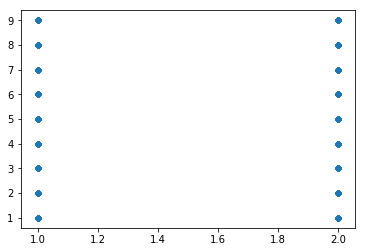

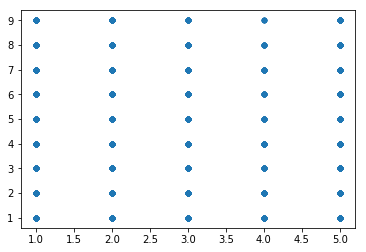

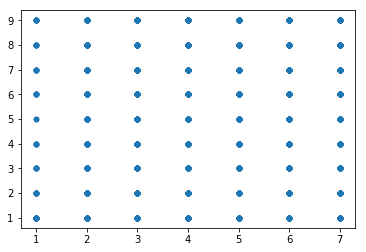

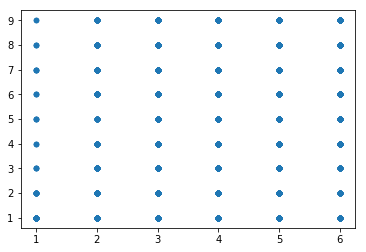

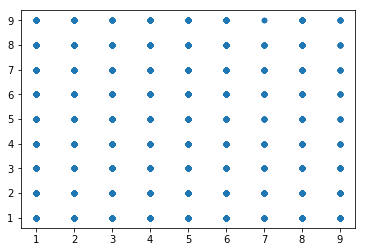

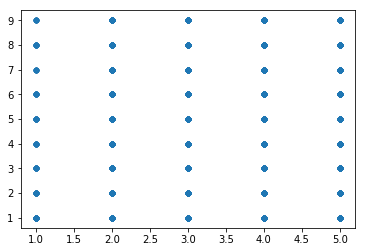

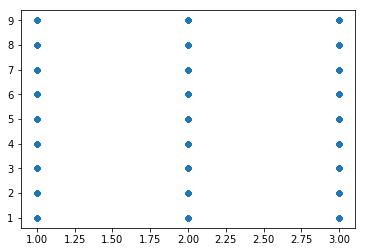

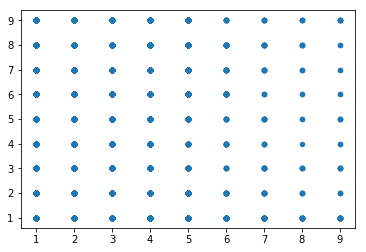

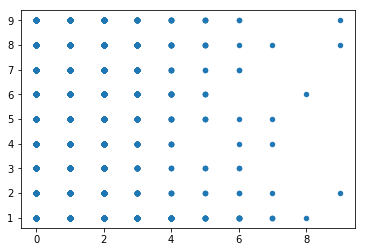

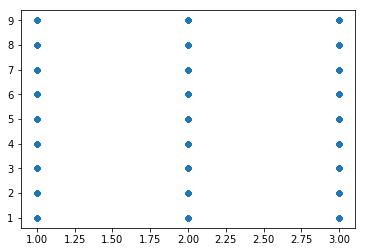

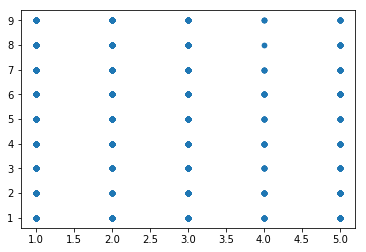

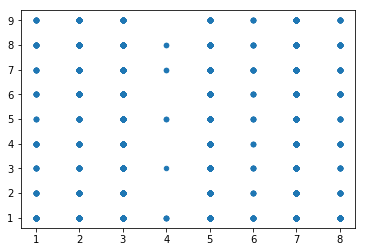

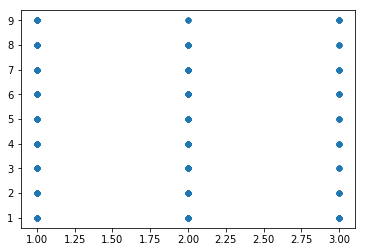

In [65]:
import matplotlib.pyplot as plt

for i in range(13):
    plt.figure()
    plt.scatter(train[:,i],train[:,-1],s = 20) 
    plt.show

In [2]:
trains = pd.read_csv('train.csv', header=None)

x = pd.DataFrame(trains)
x = x.replace('?',np.nan)

imp = si(missing_values=np.nan ,strategy='most_frequent')
imp.fit(x)
x = imp.transform(x)

train = np.array(x, dtype=np.int)
train = train.astype(np.int)

train_ce = train.copy()

e = train_ce[:,5]
f = train_ce[:,3]
j = train_ce[:,4]
q = np.array([e,f,j,train_ce[:,-1]])

train_ce = (q.T)

In [3]:
tests = pd.read_csv('test.csv', header=None)

x = pd.DataFrame(tests)
x = x.replace('?',np.nan)

imp = si(missing_values=np.nan ,strategy='most_frequent')
imp.fit(x)
x = imp.transform(x)

test = np.array(x, dtype=np.int)
test = test.astype(np.int)

test_ce = test.copy()

e = test_ce[:,5]
f = test_ce[:,3]
j = test_ce[:,4]
p = np.array([e,f,j])

test = (p.T)

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(train_ce[:,:-1],train_ce[:,-1])


y = clf.predict(test)
yc = np.array(y)
np.savetxt('yc.csv',yc)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 最好效果32

trains = pd.read_csv('train.csv', header=None)
x = pd.DataFrame(trains)
x = x.replace('?',np.nan)
imp = si(missing_values=np.nan ,strategy='most_frequent')
imp.fit(x)
x = imp.transform(x)
train = np.array(x, dtype=np.int)
train = train.astype(np.int)


tests = pd.read_csv('test.csv', header=None)
x = pd.DataFrame(tests)
x = x.replace('?',np.nan)
imp = si(missing_values=np.nan ,strategy='most_frequent')
imp.fit(x)
x = imp.transform(x)
test = np.array(x, dtype=np.int)
test = test.astype(np.int)

knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(train[:,:-1],train[:,-1])

y = knn.predict(test)
yc = np.array(y)
np.savetxt('yc.csv',yc)

In [15]:
#卡方检验的使用
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

trains = pd.read_csv('train.csv', header=None)
x = pd.DataFrame(trains)
x = x.replace('?',np.nan)
imp = si(missing_values=np.nan ,strategy='most_frequent')
imp.fit(x)
x = imp.transform(x)
train = np.array(x, dtype=np.int)
train = train.astype(np.int)

model1 = SelectKBest(chi2, k=6)
train = model1.fit_transform(train[:,:-1], train[:,-1])

train_test = train[-1000:]
train_train = train[:-1000]



In [16]:
from sklearn.neighbors import KNeighborsClassifier
# 最好效果32

knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(train_train[:,:-1],train_train[:,-1])
knn.score(train_test[:,:-1],train_test[:,-1])


0.69799999999999995

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

